For one Ei, calculate resolution functions at a bunch of energy transfers

In [2]:
%cd ~/dv/srins/graphite-DOS/notebooks/

/home/lj7/dv/srins/graphite-DOS/notebooks


In [3]:
import numpy as np, os
from matplotlib import pyplot as plt
%matplotlib inline
import histogram.hdf as hh, histogram as H

In [4]:
from dgsres.powder import use_ConstantQEKernel

## Explanation of parameters
* Q=11. If choose center of the dynamic range, Q should be around 12. But the coverage of ARCS det system is not very good near that. That is why we use Q=11
* ncount=1e7 and nodes=20 takes about 10min per energy
* dE probably should be around 0.5% of the Ei

In [5]:
sim = use_ConstantQEKernel.Sim(
    workdir = "/SNS/users/lj7/simulations/ARCS/graphite/resolution/Ei_300_demo",
    beamdir = "/SNS/users/lj7/simulations/ARCS/beam/300meV-n3e9",
    Ei = 300,
    Q = 11.,
    dQ_axis = (-1, 1, 0.02),
    dE_axis = (-60, 40, 1.),
    ncount = 1e7,
    nodes = 20
)

## Test one E

In [8]:
sim.run(E=260.)

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


In [9]:
ls {sim.workdir}/out

ie-Q_11.0-E_260.0.h5  iqe-Q_11.0-E_260.0.h5


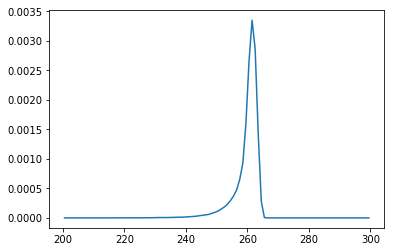

In [18]:
H.plot(hh.load(os.path.join(sim.outdir, 'ie-Q_11.0-E_260.0.h5')))

## Run all Es

In [10]:
%%time
for E in np.arange(0., 300., 15.):
    if os.path.exists(os.path.join(sim.outdir, 'iqe-Q_11.0-E_%s.h5' % E)): continue
    print E
    sim.run(E)

15.0


/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


45.0
75.0
105.0
135.0
165.0
195.0
225.0
255.0
285.0
CPU times: user 864 ms, sys: 220 ms, total: 1.08 s
Wall time: 1h 21min 14s


In [11]:
ls {sim.outdir}

ie-Q_11.0-E_0.0.h5    ie-Q_11.0-E_270.0.h5   iqe-Q_11.0-E_180.0.h5
ie-Q_11.0-E_105.0.h5  ie-Q_11.0-E_285.0.h5   iqe-Q_11.0-E_195.0.h5
ie-Q_11.0-E_120.0.h5  ie-Q_11.0-E_30.0.h5    iqe-Q_11.0-E_210.0.h5
ie-Q_11.0-E_135.0.h5  ie-Q_11.0-E_45.0.h5    iqe-Q_11.0-E_225.0.h5
ie-Q_11.0-E_150.0.h5  ie-Q_11.0-E_60.0.h5    iqe-Q_11.0-E_240.0.h5
ie-Q_11.0-E_15.0.h5   ie-Q_11.0-E_75.0.h5    iqe-Q_11.0-E_255.0.h5
ie-Q_11.0-E_165.0.h5  ie-Q_11.0-E_90.0.h5    iqe-Q_11.0-E_260.0.h5
ie-Q_11.0-E_180.0.h5  iqe-Q_11.0-E_0.0.h5    iqe-Q_11.0-E_270.0.h5
ie-Q_11.0-E_195.0.h5  iqe-Q_11.0-E_105.0.h5  iqe-Q_11.0-E_285.0.h5
ie-Q_11.0-E_210.0.h5  iqe-Q_11.0-E_120.0.h5  iqe-Q_11.0-E_30.0.h5
ie-Q_11.0-E_225.0.h5  iqe-Q_11.0-E_135.0.h5  iqe-Q_11.0-E_45.0.h5
ie-Q_11.0-E_240.0.h5  iqe-Q_11.0-E_150.0.h5  iqe-Q_11.0-E_60.0.h5
ie-Q_11.0-E_255.0.h5  iqe-Q_11.0-E_15.0.h5   iqe-Q_11.0-E_75.0.h5
ie-Q_11.0-E_260.0.h5  iqe-Q_11.0-E_165.0.h5  iqe-Q_11.0-E_90.0.h5


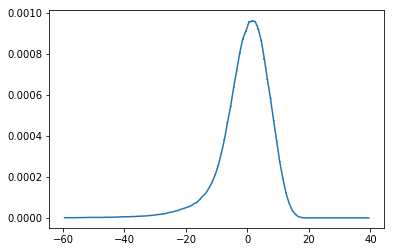

In [12]:
H.plot(hh.load(os.path.join(sim.outdir, 'ie-Q_11.0-E_0.0.h5')))

## Code for Debugging

In [ ]:
%cd {sim.simdir}

In [ ]:
!time mcvine instruments arcs nxs reduce sim.nxs --qaxis 11 13 0.1 --eaxis 210 290 2 --tof2E

In [ ]:
H.plot(hh.load(os.path.join(sim.simdir, 'iqe.h5')), min=0)

In [ ]:
iqe.I[iqe.I!=iqe.I] = 0

In [ ]:
ie = iqe.sum('Q')

In [ ]:
plt.plot(ie.E, ie.I)
plt.show()